In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

germanBusiness
Best Parameters: {'C': 0.01, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
Accuracy: 0.75
MSE: 0.25
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.67      0.76        12
           2       0.64      0.88      0.74         8

    accuracy                           0.75        20
   macro avg       0.76      0.77      0.75        20
weighted avg       0.79      0.75      0.75        20



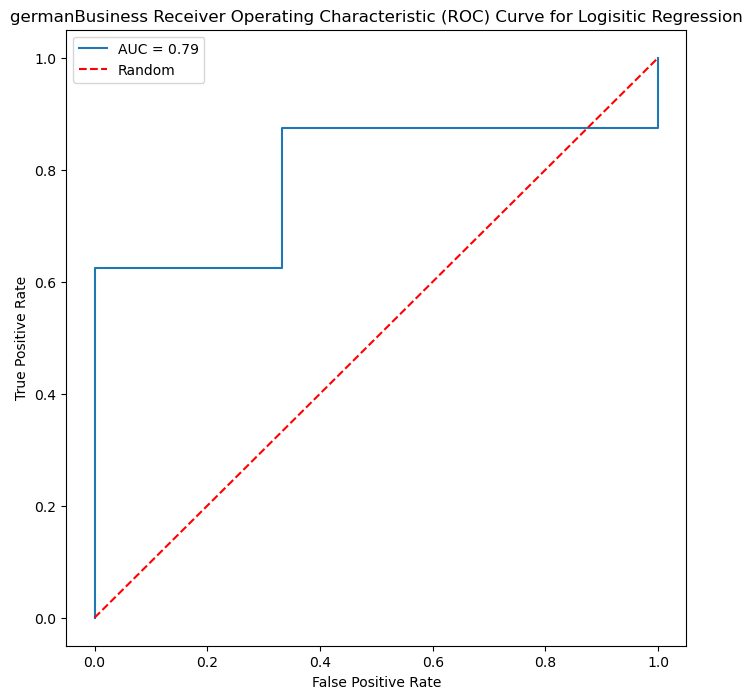

germanCarNew
Best Parameters: {'C': 1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Accuracy: 0.7021276595744681
MSE: 0.2978723404255319
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.80      0.77        30
           2       0.60      0.53      0.56        17

    accuracy                           0.70        47
   macro avg       0.68      0.66      0.67        47
weighted avg       0.70      0.70      0.70        47



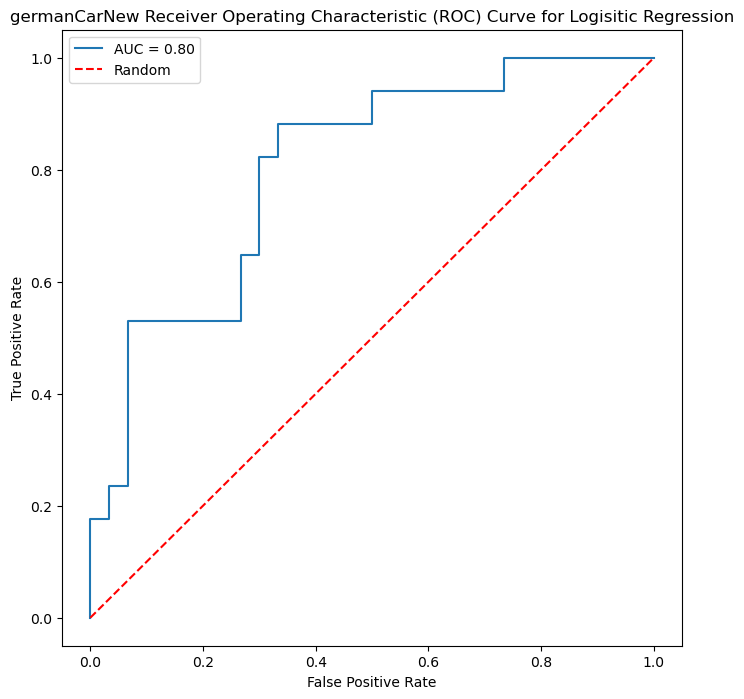

germanCarUsed
Best Parameters: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}
Accuracy: 0.9523809523809523
MSE: 0.047619047619047616
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.75      0.97      0.82        21
weighted avg       0.98      0.95      0.96        21



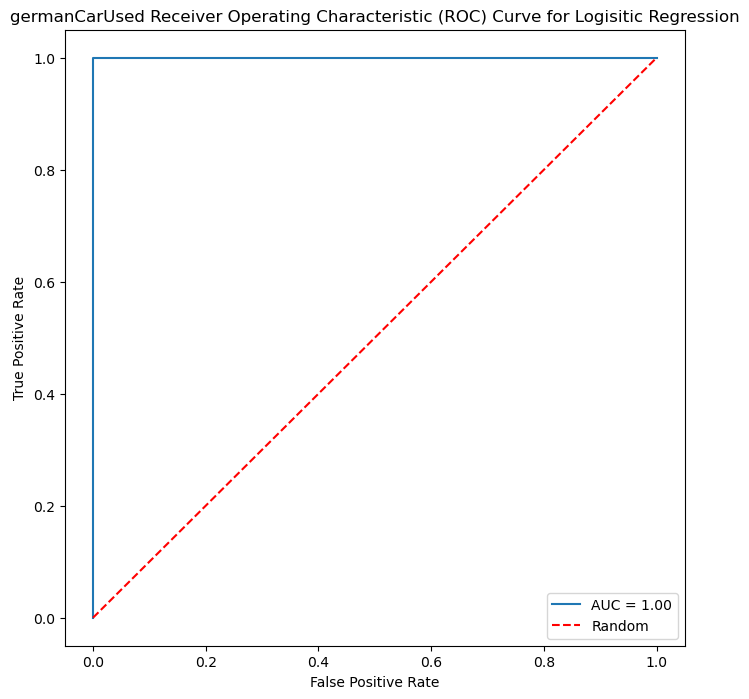

germanEducation2
Best Parameters: {'C': 0.001, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
Accuracy: 0.6
MSE: 0.4
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.50      0.67         8
           2       0.33      1.00      0.50         2

    accuracy                           0.60        10
   macro avg       0.67      0.75      0.58        10
weighted avg       0.87      0.60      0.63        10



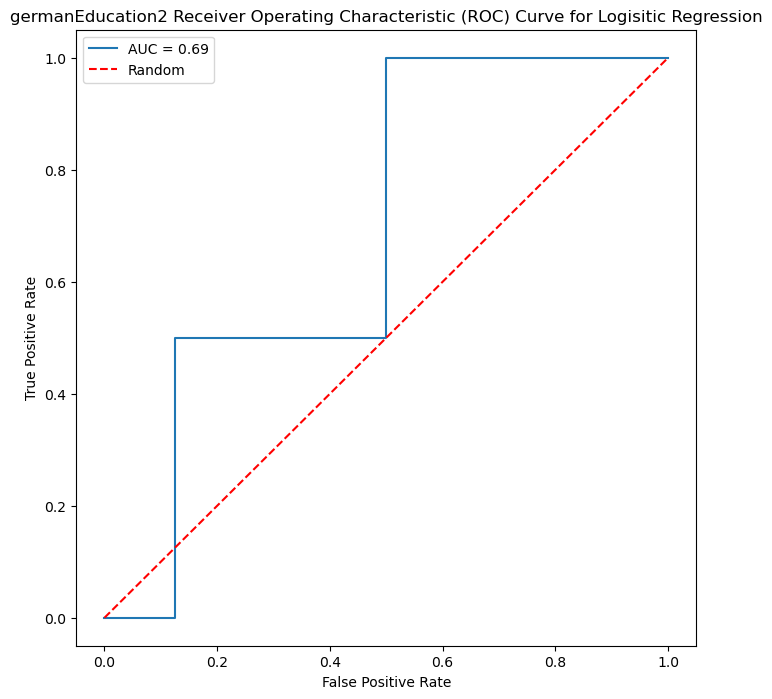

germanFurniture
Best Parameters: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
Accuracy: 0.7297297297297297
MSE: 0.2702702702702703
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.82      0.82        28
           2       0.44      0.44      0.44         9

    accuracy                           0.73        37
   macro avg       0.63      0.63      0.63        37
weighted avg       0.73      0.73      0.73        37



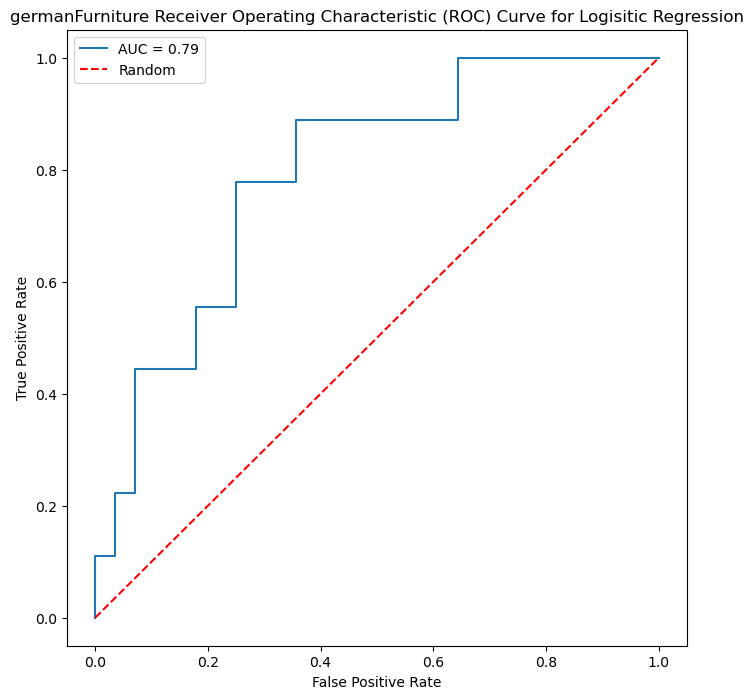

germanRadio_TV
Best Parameters: {'C': 1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Accuracy: 0.8392857142857143
MSE: 0.16071428571428573
Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.93      0.90        44
           2       0.67      0.50      0.57        12

    accuracy                           0.84        56
   macro avg       0.77      0.72      0.74        56
weighted avg       0.83      0.84      0.83        56



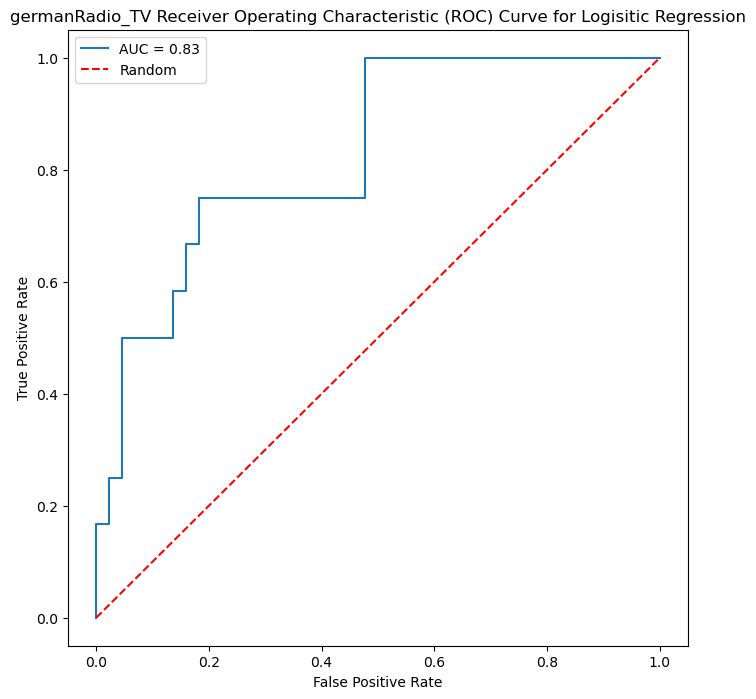

germanRepairs
Best Parameters: {'C': 0.001, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Accuracy: 0.8
MSE: 0.2
Classification Report:
               precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



c:\Users\abdul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


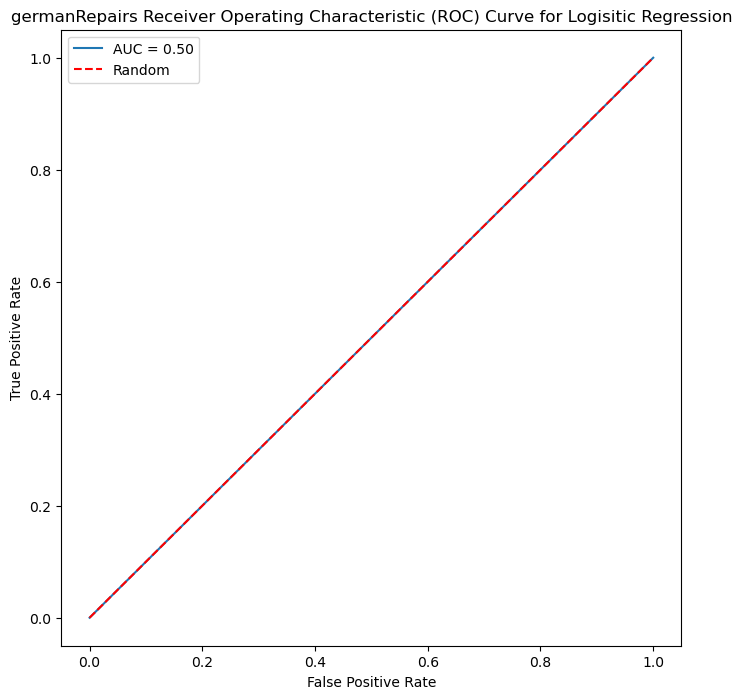

In [4]:
#Took out germanAppliance2, germanOther, germanRetraining2 because not enough data
file_list = ['germanBusiness.csv', 'germanCarNew.csv', 'germanCarUsed.csv',
            'germanEducation2.csv', 'germanFurniture.csv', 'germanRadio_TV.csv', 'germanRepairs.csv']

# Initialize an empty dictionary to store DataFrames
dataframes = {}

# Loop through the files and read them into DataFrames
for file in file_list:
    df = pd.read_csv(f"../datasets/cleanData/{file}")
    dataframes[file[:-4]] = df

for name, df in dataframes.items():
    print(name)
    train, test = train_test_split(df, test_size=0.20, random_state=3)
    # The remaining
    X_train, y_train = train.drop(columns=['Class']) ,train['Class']
    X_test, y_test = test.drop(columns=['Class']), test['Class']

    # Feature scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test= sc.transform(X_test)

    # Define the parameter grid for grid search
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'fit_intercept': [True, False],
        'tol': [1e-3, 1e-4, 1e-5],
    }

    # Initialize the Logistic Regression model
    log_cls = LogisticRegression(max_iter=1000000)

    # Create a GridSearchCV object
    grid_search = GridSearchCV(log_cls, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Get the best model from the grid search
    best_log_cls = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_log_cls.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("MSE:", mse)
    print("Classification Report:\n", report)

    # Make predictions on the test set
    y_probs = best_log_cls.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds= roc_curve(y_test, y_probs, pos_label=1)

    # Plot the ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(tpr, fpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} Receiver Operating Characteristic (ROC) Curve for Logisitic Regression')
    plt.legend()
    plt.show()